In [1]:
! pip install folium matplotlib mapclassify
! pip install geopandas
import folium
import json
import requests
import seaborn as sns
import geopandas as gpd
import matplotlib as plt
import matplotlib.pyplot as plt
import mapclassify

In [12]:
#Add  to geojson map dataframe
df = gpd.read_file('C:/Users/HP/Desktop/GMT 320/Joyce/country_boundaries_v2.json')
df

,SOVEREIGNT,TYPE,ADMIN,NAME,NAME_LONG,FORMAL_EN,POP_EST,POP_RANK,ECONOMY,INCOME_GRP,CONTINENT,SUBREGION,REGION_WB,LABEL_X,LABEL_Y,geometry
0,Fiji,Sovereign country,Fiji,Fiji,Fiji,Republic of Fiji,889953.0,11,6. Developing region,4. Lower middle income,Oceania,Melanesia,East Asia & Pacific,177.975427,-17.826099,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,Sovereign country,United Republic of Tanzania,Tanzania,Tanzania,United Republic of Tanzania,58005463.0,16,7. Least developed region,5. Low income,Africa,Eastern Africa,Sub-Saharan Africa,34.959183,-6.051866,"MULTIPOLYGON (((33.90371 -0.95000, 34.07262 -1..."
2,Western Sahara,Indeterminate,Western Sahara,W. Sahara,Western Sahara,Sahrawi Arab Democratic Republic,603253.0,11,7. Least developed region,5. Low income,Africa,Northern Africa,Middle East & North Africa,-12.630304,23.967592,"MULTIPOLYGON (((-8.66559 27.65643, -8.66512 27..."
3,Canada,Sovereign country,Canada,Canada,Canada,Canada,37589262.0,15,1. Developed region: G7,1. High income: OECD,North America,Northern America,North America,-101.910700,60.324287,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,Country,United States of America,United States of America,United States,United States of America,328239523.0,17,1. Developed region: G7,1. High income: OECD,North America,Northern America,North America,-97.482602,39.538479,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Republic of Serbia,Sovereign country,Republic of Serbia,Serbia,Serbia,Republic of Serbia,6944975.0,13,6. Developing region,3. Upper middle income,Europe,Southern Europe,Europe & Central Asia,20.787989,44.189919,"MULTIPOLYGON (((18.82982 45.90887, 18.82984 45..."
173,Montenegro,Sovereign country,Montenegro,Montenegro,Montenegro,Montenegro,622137.0,11,6. Developing region,3. Upper middle income,Europe,Southern Europe,Europe & Central Asia,19.143727,42.803101,"MULTIPOLYGON (((20.07070 42.58863, 19.80161 42..."
174,Kosovo,Disputed,Kosovo,Kosovo,Kosovo,Republic of Kosovo,1794248.0,12,6. Developing region,4. Lower middle income,Europe,Southern Europe,Europe & Central Asia,20.860719,42.593587,"MULTIPOLYGON (((20.59025 41.85541, 20.52295 42..."
175,Trinidad and Tobago,Sovereign country,Trinidad and Tobago,Trinidad and Tobago,Trinidad and Tobago,Republic of Trinidad and Tobago,1394973.0,12,6. Developing region,2. High income: nonOECD,North America,Caribbean,Latin America & Caribbean,-60.918400,10.998900,"MULTIPOLYGON (((-61.68000 10.76000, -61.10500 ..."


In [13]:
#  Import ports shapefile
fp="C:/Users/HP/Desktop/GMT 320/Joyce/ne_10m_populated_places_simple.shp"
cities = gpd.read_file(fp)
cities

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capalt,...,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id,geometry
0,10,1,8.0,Admin-1 capital,Colonia del Sacramento,None,None,Colonia del Sacramento,0,0,...,21714,21714,0.0,7,7,None,None,9.0,1159112629,POINT (-57.83612 -34.46979)
1,10,1,8.0,Admin-1 capital,Trinidad,None,None,Trinidad,0,0,...,21093,21093,0.0,7,7,None,None,9.0,1159112647,POINT (-56.90100 -33.54400)
2,10,1,8.0,Admin-1 capital,Fray Bentos,None,None,Fray Bentos,0,0,...,23279,23279,0.0,7,7,None,None,9.0,1159112663,POINT (-58.30400 -33.13900)
3,10,1,8.0,Admin-1 capital,Canelones,None,None,Canelones,0,0,...,19698,19698,0.0,6,6,None,None,9.0,1159112679,POINT (-56.28400 -34.53800)
4,10,1,8.0,Admin-1 capital,Florida,None,None,Florida,0,0,...,32234,32234,0.0,7,7,None,None,7.0,1159112703,POINT (-56.21500 -34.09900)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7337,0,600,1.0,Admin-1 capital,Rio de Janeiro,None,None,Rio de Janeiro,0,0,...,11748000,2010175,1821489.0,14,12,Rio de Janeiro,Rio de Janeiro,1.7,1159151619,POINT (-43.21212 -22.90731)
7338,0,600,1.0,Admin-1 capital,São Paulo,None,Sao Paulo|Sio Paulo,Sao Paulo,0,0,...,18845000,10021295,11522944.0,14,14,S,Sao Paolo,3.0,1159151621,POINT (-46.62697 -23.55673)
7339,0,600,3.0,Admin-1 capital,Sydney,None,None,Sydney,0,0,...,4630000,3641422,2669348.0,12,12,Sydney,Sydney1,1.7,1159151623,POINT (151.21255 -33.87137)
7340,0,600,0.0,Admin-0 capital,Singapore,None,None,Singapore,1,0,...,5183700,3289529,3314179.0,13,12,Singapore,Singapore,2.1,1159151627,POINT (103.85387 1.29498)


In [15]:
#set dataframe to same projection
df = df.to_crs(epsg=4326)
cities = cities.to_crs(epsg=4326)


In [27]:
#Join both dataframes
cities_join = gpd.sjoin(
    df,
    cities,
    how='left',
    op='intersects',
)
cities_join.head()

c:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,SOVEREIGNT,TYPE,ADMIN,NAME,NAME_LONG,FORMAL_EN,POP_EST,POP_RANK,ECONOMY,INCOME_GRP,...,longitude,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id
0,Fiji,Sovereign country,Fiji,Fiji,Fiji,Republic of Fiji,889953.0,11,6. Developing region,4. Lower middle income,...,178.441707,175399.0,88271.0,0.0,9.0,8.0,None,Suva,5.0,1.159151e+09
0,Fiji,Sovereign country,Fiji,Fiji,Fiji,Republic of Fiji,889953.0,11,6. Developing region,4. Lower middle income,...,177.416602,42284.0,12374.0,12374.0,7.0,6.0,None,Nandi,6.1,1.159142e+09
0,Fiji,Sovereign country,Fiji,Fiji,Fiji,Republic of Fiji,889953.0,11,6. Developing region,4. Lower middle income,...,177.466625,55894.0,55894.0,55894.0,8.0,8.0,None,Lautoka,6.1,1.159142e+09
0,Fiji,Sovereign country,Fiji,Fiji,Fiji,Republic of Fiji,889953.0,11,6. Developing region,4. Lower middle income,...,179.383304,24187.0,24187.0,0.0,7.0,7.0,None,Labasa,6.0,1.159147e+09
1,United Republic of Tanzania,Sovereign country,United Republic of Tanzania,Tanzania,Tanzania,United Republic of Tanzania,58005463.0,16,7. Least developed region,5. Low income,...,36.669999,341136.0,320074.0,329764.0,10.0,10.0,None,Arusha,5.6,1.159150e+09


In [49]:
#GroupBy Sovereignt and count the number of cities per country
cities_count = cities_join.groupby( ['FORMAL_EN'],as_index=False,)['ls_name'].count()
cities_count

,FORMAL_EN,ls_name
0,Arab Republic of Egypt,31
1,Argentine Republic,151
2,Belize,3
3,Bolivarian Republic of Venezuela,41
4,Bosnia and Herzegovina,6
...,...,...
169,United Kingdom of Great Britain and Northern I...,49
170,United Mexican States,181
171,United Republic of Tanzania,50
172,United States of America,733


In [50]:
# give column new name
cities_count.columns =['FORMAL_EN','Num_cities']
cities_count

,FORMAL_EN,Num_cities
0,Arab Republic of Egypt,31
1,Argentine Republic,151
2,Belize,3
3,Bolivarian Republic of Venezuela,41
4,Bosnia and Herzegovina,6
...,...,...
169,United Kingdom of Great Britain and Northern I...,49
170,United Mexican States,181
171,United Republic of Tanzania,50
172,United States of America,733


In [51]:
#Join newly created dataframes to country dataframe
new_df = df.merge(
   cities_count,
   on='FORMAL_EN',
   how='left'
)
new_df.head()

,SOVEREIGNT,TYPE,ADMIN,NAME,NAME_LONG,FORMAL_EN,POP_EST,POP_RANK,ECONOMY,INCOME_GRP,CONTINENT,SUBREGION,REGION_WB,LABEL_X,LABEL_Y,geometry,Num_cities
0,Fiji,Sovereign country,Fiji,Fiji,Fiji,Republic of Fiji,889953.0,11,6. Developing region,4. Lower middle income,Oceania,Melanesia,East Asia & Pacific,177.975427,-17.826099,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",4.0
1,United Republic of Tanzania,Sovereign country,United Republic of Tanzania,Tanzania,Tanzania,United Republic of Tanzania,58005463.0,16,7. Least developed region,5. Low income,Africa,Eastern Africa,Sub-Saharan Africa,34.959183,-6.051866,"MULTIPOLYGON (((33.90371 -0.95000, 34.07262 -1...",50.0
2,Western Sahara,Indeterminate,Western Sahara,W. Sahara,Western Sahara,Sahrawi Arab Democratic Republic,603253.0,11,7. Least developed region,5. Low income,Africa,Northern Africa,Middle East & North Africa,-12.630304,23.967592,"MULTIPOLYGON (((-8.66559 27.65643, -8.66512 27...",0.0
3,Canada,Sovereign country,Canada,Canada,Canada,Canada,37589262.0,15,1. Developed region: G7,1. High income: OECD,North America,Northern America,North America,-101.910700,60.324287,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",233.0
4,United States of America,Country,United States of America,United States of America,United States,United States of America,328239523.0,17,1. Developed region: G7,1. High income: OECD,North America,Northern America,North America,-97.482602,39.538479,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",733.0


<AxesSubplot:>

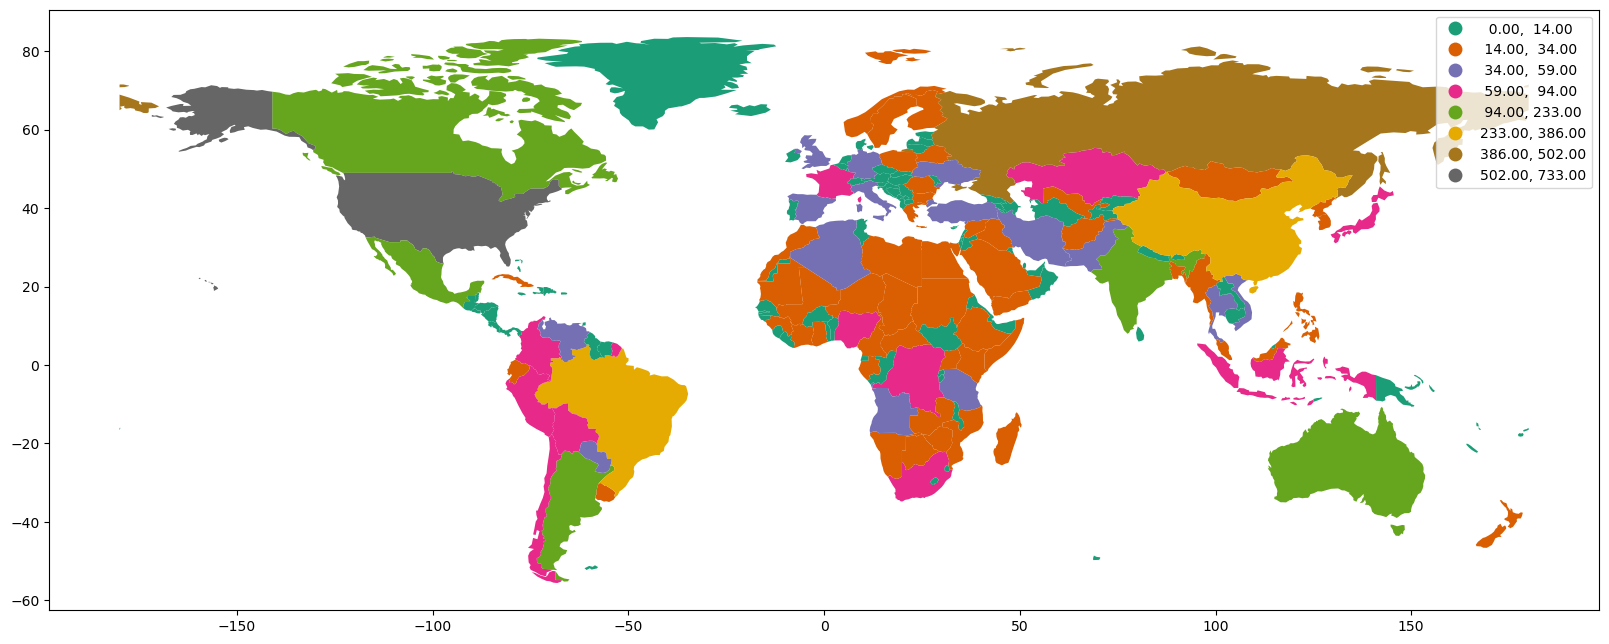

In [58]:
# Create map showing number of cities per country
#classify choropleth map into 8 classes
#Define map properties
column='Num_cities'
k_classes=8
scheme="natural_breaks"
cmap = 'Viridis'
figsize=(20,20)

#Create function for choropleth map with 7 classes
def createMap( df,column,scheme,cmap,figsize):
    map = new_df.plot( column=column, scheme=scheme,legend=True,cmap = 'Dark2',k=k_classes,figsize=(20,20))
    return map
#Call the function
createMap(df,column,scheme,cmap,figsize)